# SHELTER ANIMAL OUTCOMES 
by Ebru Yaren Çatak

---



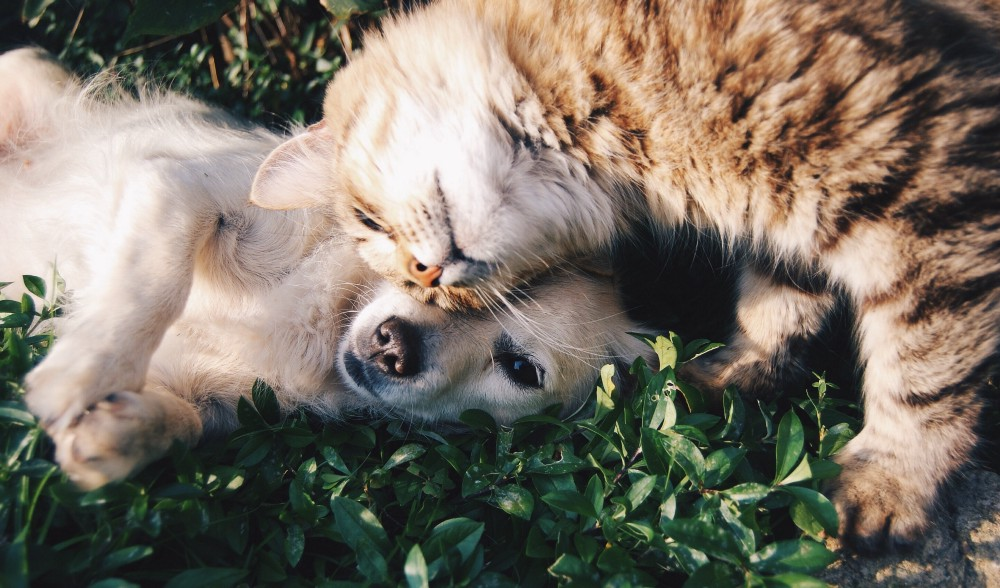

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Train

In [ ]:
train = pd.read_csv("/content/drive/My Drive/train.csv.gz")
train.columns = map(str.lower, train.columns)

In [ ]:
train.name.unique().size

6375

In [ ]:
train.describe()

,animalid,name,datetime,outcometype,outcomesubtype,animaltype,sexuponoutcome,ageuponoutcome,breed,color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A664038,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   animalid        26729 non-null  object
 1   name            26729 non-null  object
 2   datetime        26729 non-null  object
 3   outcometype     26729 non-null  object
 4   outcomesubtype  13117 non-null  object
 5   animaltype      26729 non-null  object
 6   sexuponoutcome  26728 non-null  object
 7   ageuponoutcome  26711 non-null  object
 8   breed           26729 non-null  object
 9   color           26729 non-null  object
 10  hasName         26729 non-null  int64 
 11  isNeutered      26729 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.4+ MB


## Test

In [ ]:
test = pd.read_csv("/content/drive/My Drive/test.csv.gz")
test.columns = map(str.lower, test.columns)

In [ ]:
test.shape

(11456, 8)

In [ ]:
test.head()

,id,name,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [ ]:
train.apply(lambda x: sum(x.isnull()/len(train)))

animalid          0.000000
name              0.287740
datetime          0.000000
outcometype       0.000000
outcomesubtype    0.509260
animaltype        0.000000
sexuponoutcome    0.000037
ageuponoutcome    0.000673
breed             0.000000
color             0.000000
dtype: float64

## EDA

Outcome Types

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


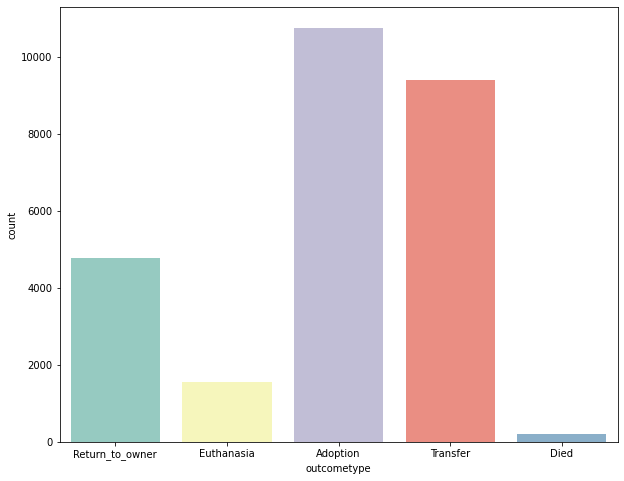

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(train.outcometype, palette='Set3')

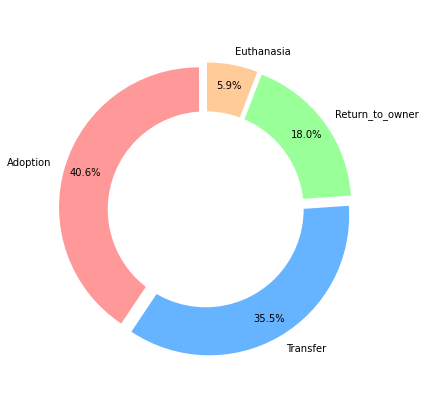

In [ ]:
outcome_type = train['outcometype'].value_counts().head(4)
plt.figure(figsize=(6,6))
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05)
plt.pie(outcome_type, colors = colors, labels=outcome_type.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Animal Types

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


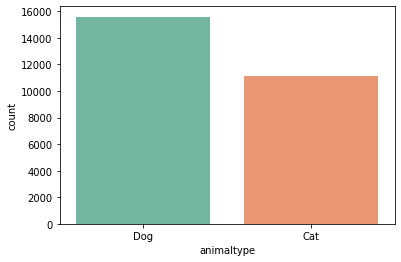

In [ ]:
sns.countplot(train.animaltype, palette='Set2')

Animal Type And Outcome

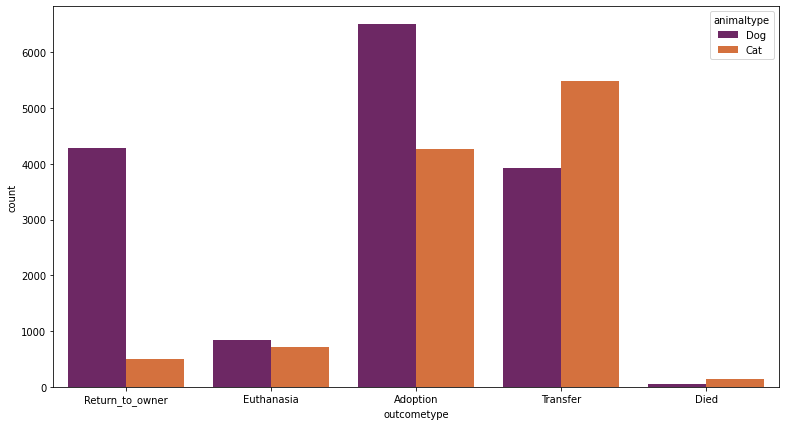

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(13, 7))
sns.countplot(data=train, x='outcometype',hue='animaltype', palette='inferno')

Date Times

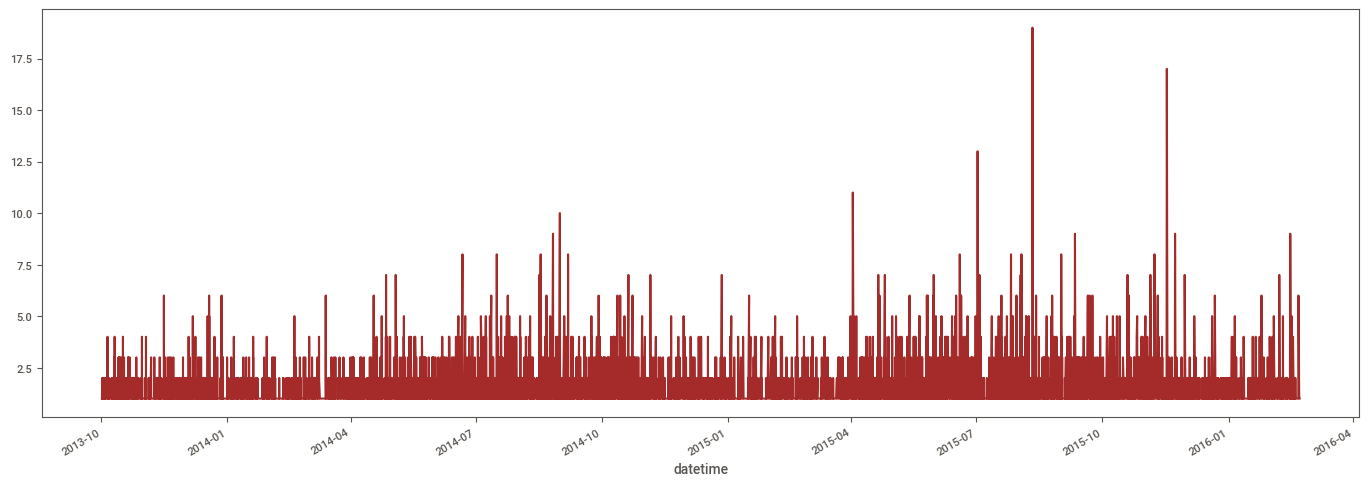

In [ ]:
#Time series
plt.figure(figsize=(17,6))
train["outcometype"].groupby(train["datetime"]).count().plot(kind="line", color = 'brown')

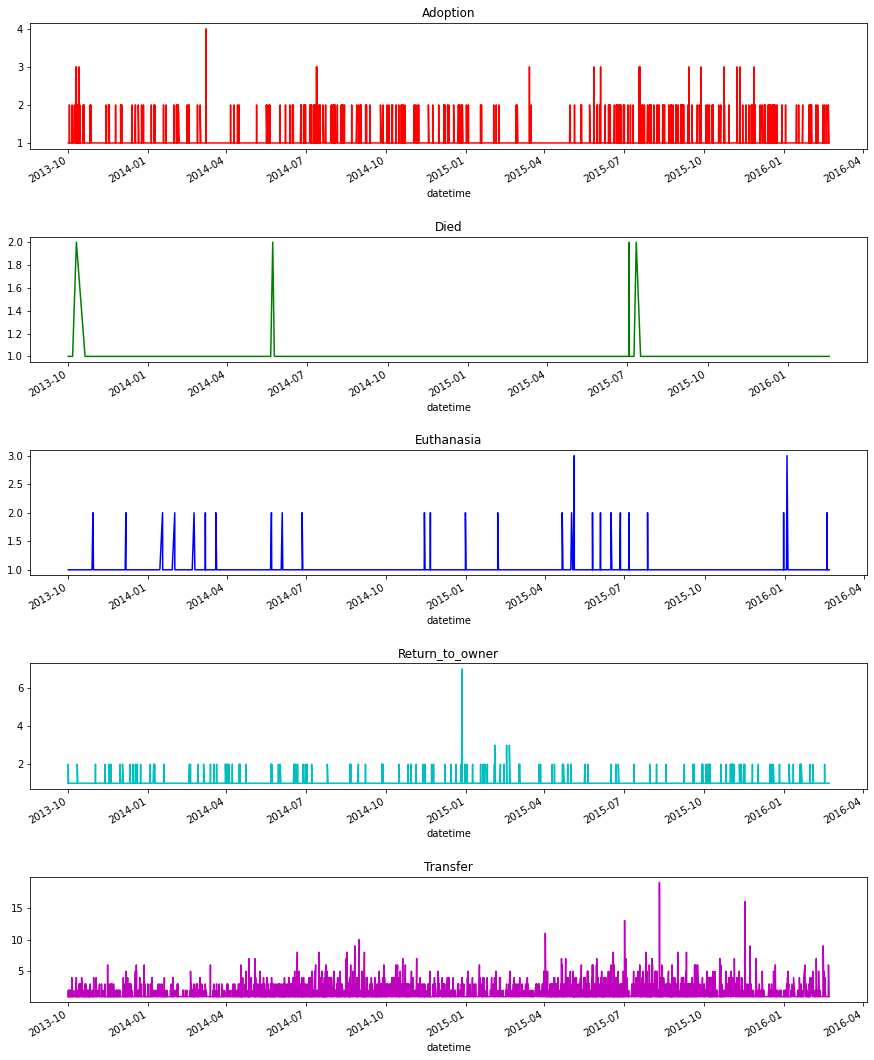

In [ ]:
#For each outcome
monthGroup=train["datetime"].groupby(train["outcometype"])
plt.subplots(5, 1, figsize=(15, 20), sharex=True)
plt.subplots_adjust( hspace=0.7)
colors = list('rgbcmyk')
for i, (_, g) in enumerate(monthGroup):
    plt.subplot(5,1,i+1)
    plt.title(_)
    g.groupby(train["datetime"]).count().plot(kind="line", color=colors[i])

In [ ]:
pip install sweetviz

     |████████████████████████████████| 327kB 2.6MB/s 
     |████████████████████████████████| 71kB 4.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(train)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Data Cleaning and Feature Selection

### Data Cleaning

In [ ]:
train = train.drop(['animalid'], axis=1)

In [ ]:
np.sum(train.isnull())

name               7691
datetime              0
outcometype           0
outcomesubtype    13612
animaltype            0
sexuponoutcome        1
ageuponoutcome       18
breed                 0
color                 0
dtype: int64

In [ ]:
train.dropna(subset=['ageuponoutcome'], inplace=True)

In [ ]:
train.dropna(subset=['sexuponoutcome'], inplace=True)

In [ ]:
train = train.drop(['outcomesubtype'], axis=1)

### To Datetime

In [ ]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

### NAME

In [ ]:
def hasName(dataFrame):
  dataFrame["name"] = dataFrame["name"].fillna(0)
  dataFrame['hasName'] = dataFrame.name.apply(lambda x: 0 if x == 0 else 1)
  return dataFrame

In [ ]:
train = hasName(train)
test = hasName(test)

In [ ]:
train = train.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [ ]:
test.head()

,id,datetime,animaltype,sexuponoutcome,ageuponoutcome,breed,color,hasName
0,1,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,1
1,2,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,1
2,3,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,1
3,4,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,1
4,5,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,1


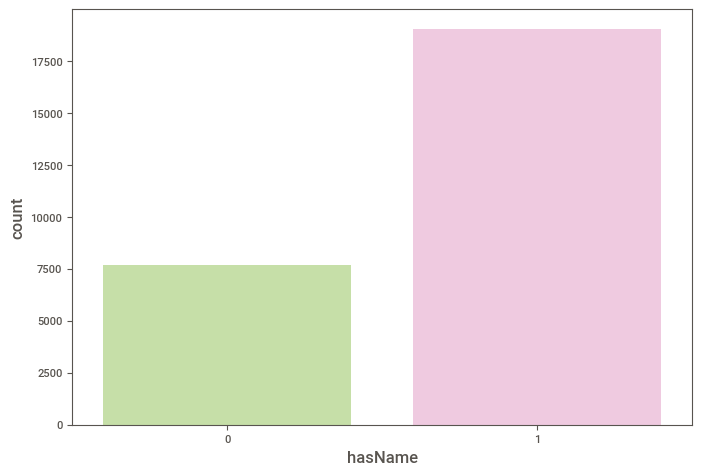

In [ ]:
sns.countplot(train.hasName, palette='PiYG_r')

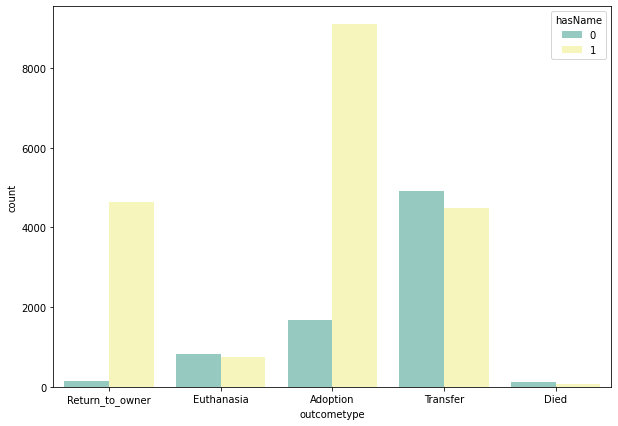

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='hasName', palette='Set3')

## AGE

In [ ]:
train.ageuponoutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

### Age in Days

In [ ]:
def calc_age_in_days(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 365
    if x.find('month')> -1: return age * 30
    if x.find('week')> -1: return age * 7
    if x.find('day')> -1: return age
    else: return 0

In [ ]:
train['AgeInDays'] = train.ageuponoutcome.apply(calc_age_in_days)
test['AgeInDays'] = test.ageuponoutcome.apply(calc_age_in_days)

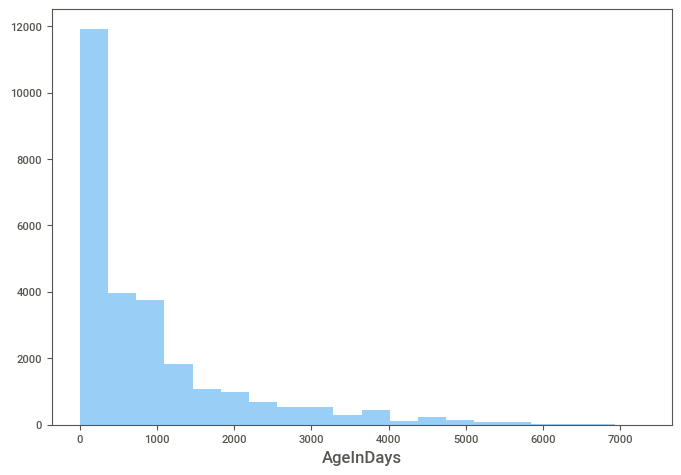

In [ ]:
sns.distplot(train.AgeInDays, bins = 20, kde=False)

### Is a Puppy?

In [ ]:
def setPuppy(dataFrame):
  dataFrame["isPuppy"] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] >= 56] = 0
  dataFrame["isPuppy"][dataFrame["AgeInDays"] < 56 ] = 1 #puppies
  return dataFrame

In [ ]:
train = setPuppy(train)
test = setPuppy(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


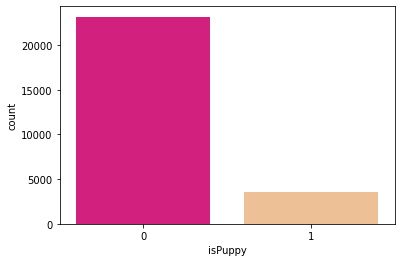

In [ ]:
sns.countplot(train.isPuppy, palette='Accent_r')

In [ ]:
train.head()

,datetime,outcometype,animaltype,sexuponoutcome,ageuponoutcome,breed,color,hasName,isNeutered,AgeInDays,isPuppy
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,1,365,0
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,0
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,1,1,730,0
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,0,0,21,1
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,0,1,730,0


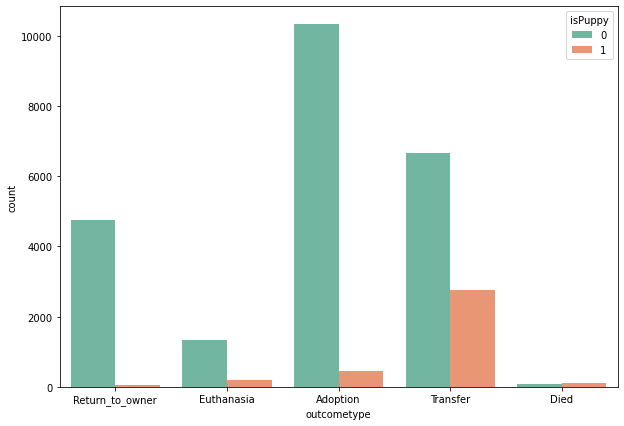

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='isPuppy', palette='Set2')

### Age in Months

In [ ]:
def calc_age_in_months(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age * 12
    if x.find('month')> -1: return age 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0

In [ ]:
train['AgeInMonths'] = train.ageuponoutcome.apply(calc_age_in_months)
test['AgeInMonths'] = test.ageuponoutcome.apply(calc_age_in_months)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


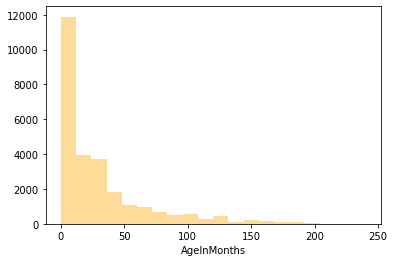

In [ ]:
sns.distplot(train.AgeInMonths, bins = 20, kde=False, color='orange')

### Age In Years

In [ ]:
def calc_age_in_years(x):
    x = str(x)
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return 0 
    if x.find('week')> -1: return 0
    if x.find('day')> -1: return 0
    else: return 0
train['AgeInYears'] = train.ageuponoutcome.apply(calc_age_in_years)
test['AgeInYears'] = test.ageuponoutcome.apply(calc_age_in_years)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


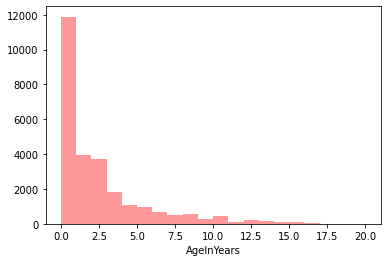

In [ ]:
sns.distplot(train.AgeInYears, bins = 20, kde=False, color='red')

In [ ]:
train = train.drop(['ageuponoutcome'], axis=1)
test = test.drop(['ageuponoutcome'], axis=1)

KeyError: ignored

In [ ]:
train.head() 

,datetime,outcometype,animaltype,sexuponoutcome,breed,color,hasName,isNeutered,AgeInDays,isPuppy,AgeInMonths,AgeInYears
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,1,365,0,12,1
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,1,365,0,12,1
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,1,730,0,24,2
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,0,21,1,0,0
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,1,730,0,24,2


## DATETIME

### Part of the Day

In [ ]:
def setPartOfTheDay(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [ ]:
train['partOfTheDay'] = train.datetime.dt.hour.apply(setPartOfTheDay)
test['partOfTheDay'] = test.datetime.dt.hour.apply(setPartOfTheDay)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


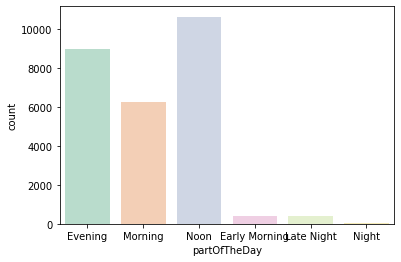

In [ ]:
sns.countplot(train.partOfTheDay, palette='Pastel2')

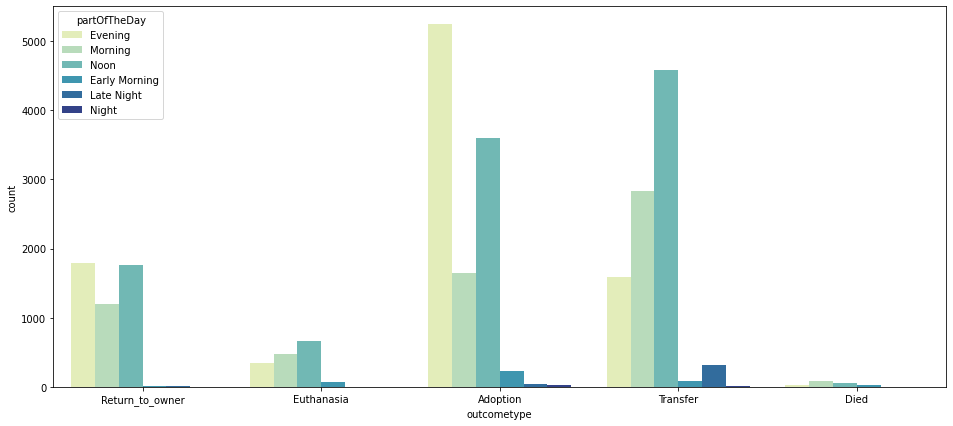

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='partOfTheDay', palette='YlGnBu')

### Weekend or Weekdays

In [ ]:
def setWeekend(x):
  if x in [0,1,2,3,4] :
    return 0
  elif x in [5,6]:
    return 1

In [ ]:
train['weekend'] = train.datetime.dt.dayofweek.apply(setWeekend)
test['weekend'] = test.datetime.dt.dayofweek.apply(setWeekend)

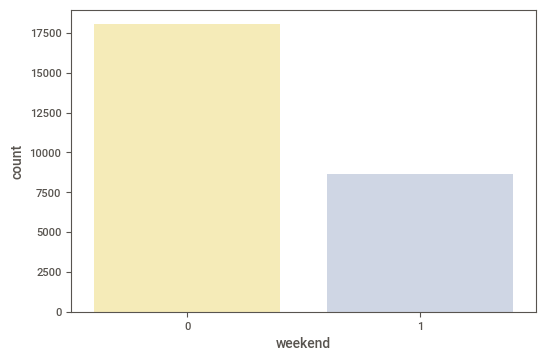

In [ ]:
sns.countplot(train.weekend, palette='Pastel2_r')

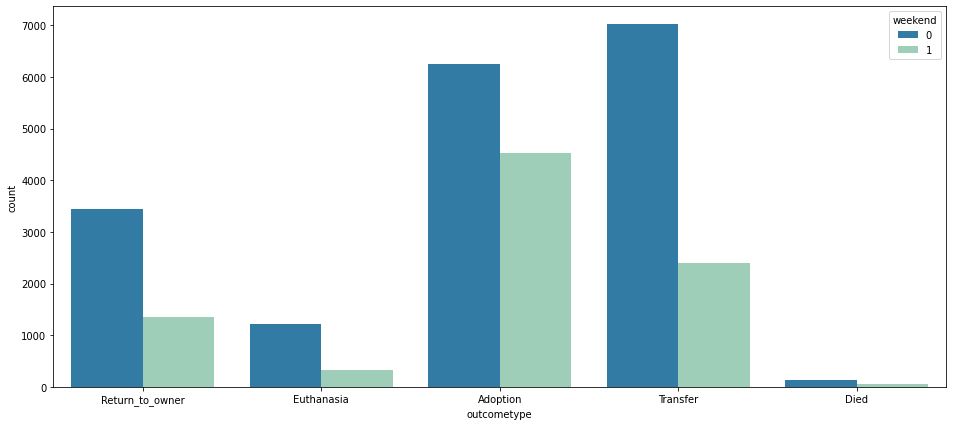

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='weekend', palette='YlGnBu_r')

### Year

In [ ]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
test['year'] = pd.DatetimeIndex(test['datetime']).year

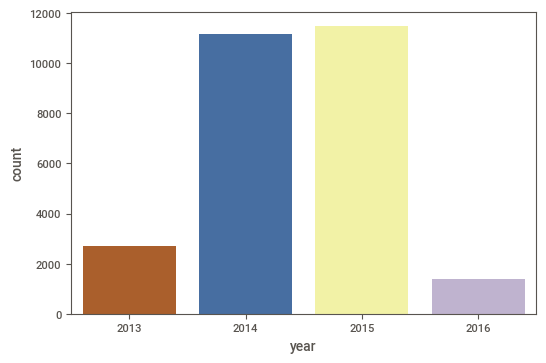

In [ ]:
sns.countplot(train.year, palette='Accent_r')

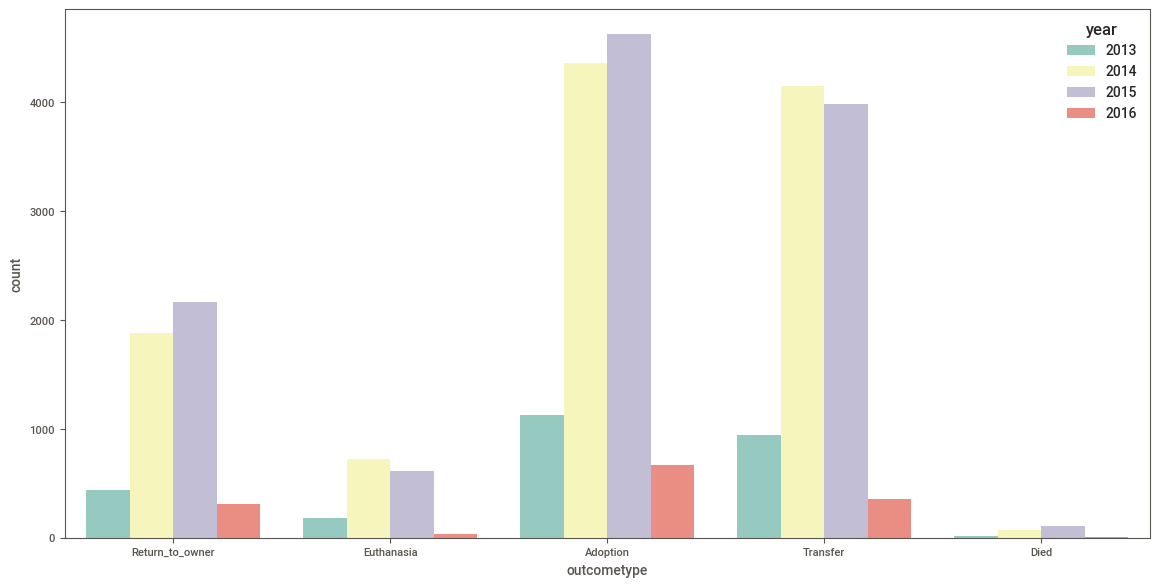

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(14, 7))
sns.countplot(data=train, x='outcometype',hue='year', palette='Set3')

### Month

In [ ]:
train['month'] = pd.DatetimeIndex(train['datetime']).month
test['month'] = pd.DatetimeIndex(test['datetime']).month

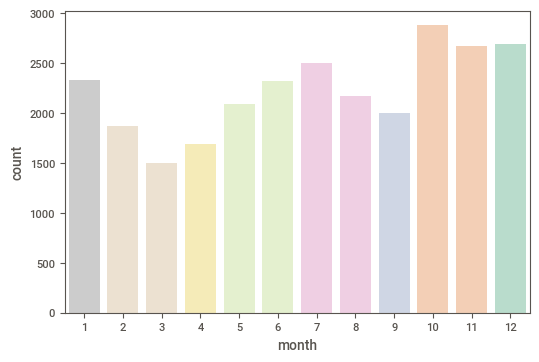

In [ ]:
sns.countplot(train.month, palette='Pastel2_r')

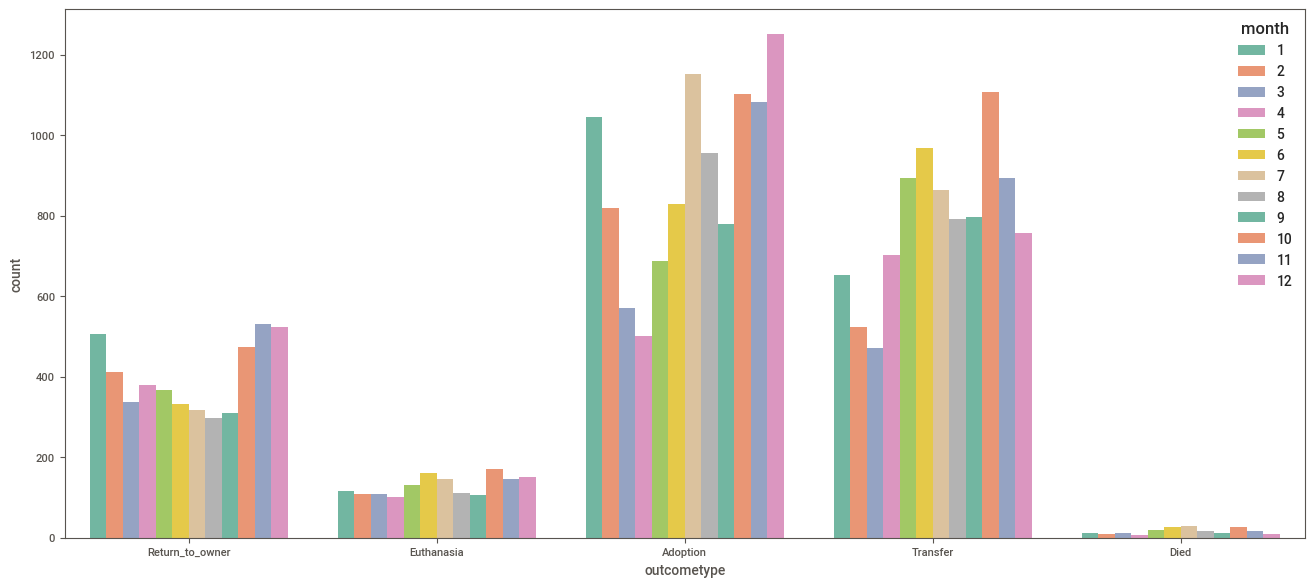

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='month', palette='Set2')

### Day of week

In [ ]:
def setDayOfWeek(x):
  if x == 0:
    return 'Mon'
  elif x == 1:
    return 'Tue'
  elif x == 2:
    return 'Wed'
  elif x == 3:
    return 'Thu'
  elif x == 4:
    return 'Fri'
  elif x == 5:
    return 'Sat'
  elif x == 6:
    return 'Sun'    

In [ ]:
train['dayOfWeek'] = train.datetime.dt.dayofweek.apply(setDayOfWeek)
test['dayOfWeek'] = test.datetime.dt.dayofweek.apply(setDayOfWeek)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


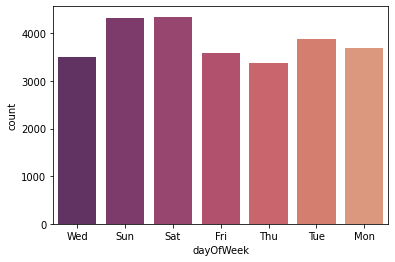

In [ ]:
sns.countplot(train.dayOfWeek, palette='flare_r')

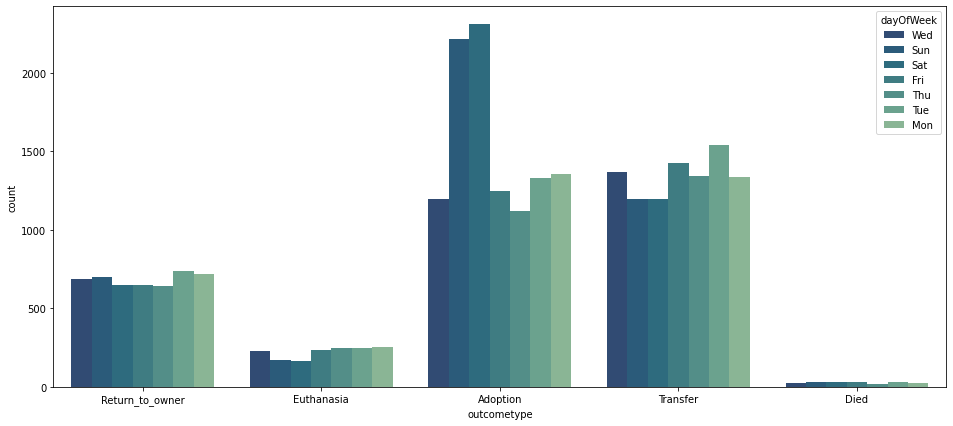

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='dayOfWeek', palette='crest_r')

### Hour

In [ ]:
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
test['hour'] = pd.DatetimeIndex(test['datetime']).hour

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


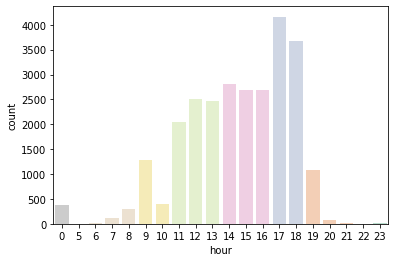

In [ ]:
sns.countplot(train.hour, palette='Pastel2_r')

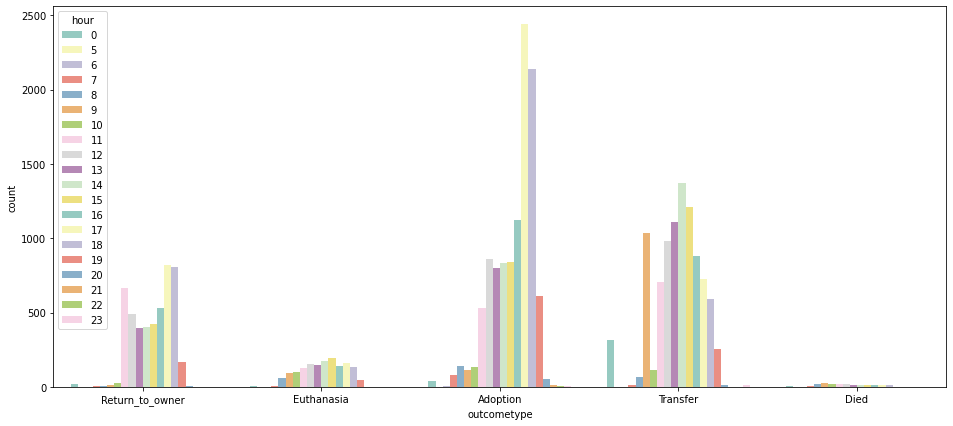

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='hour', palette='Set3')

### Season

In [ ]:
def setSeason(x):
  if x in [12,1,2]:
    return 'Winter'
  elif x in [3,4,5]:
    return 'Spring'
  elif x in [6,7,8]:
    return 'Summer'
  elif x in [9,10,11]:
    return 'Autumn'

In [ ]:
train['season'] = train.datetime.dt.month.apply(setSeason)
test['season'] = test.datetime.dt.month.apply(setSeason)

In [ ]:
train = train.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

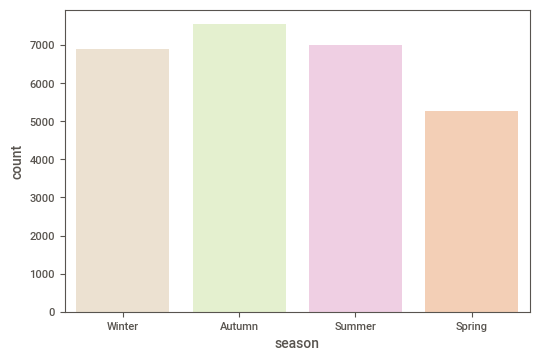

In [ ]:
sns.countplot(train.season, palette='Pastel2_r')

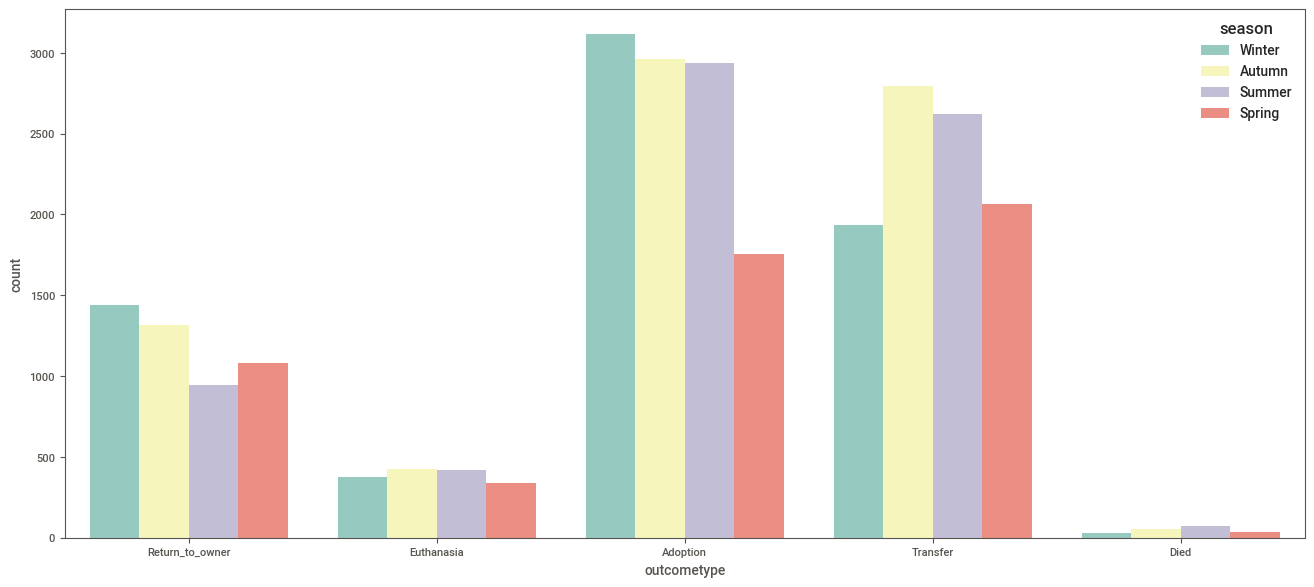

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(16, 7))
sns.countplot(data=train, x='outcometype',hue='season', palette='Set3')

In [ ]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,isNeutered,isSpayed,AgeInDays,isPuppy,AgeInMonths,partOfTheDay,weekend,year,season
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,1,0,365,0,12,Evening,0,2014,Winter
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,0,1,365,0,12,Morning,1,2013,Autumn
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,1,0,730,0,24,Morning,1,2015,Winter
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,0,0,21,1,1,Evening,0,2014,Summer
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,1,0,730,0,24,Morning,0,2013,Autumn


## GENDER

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


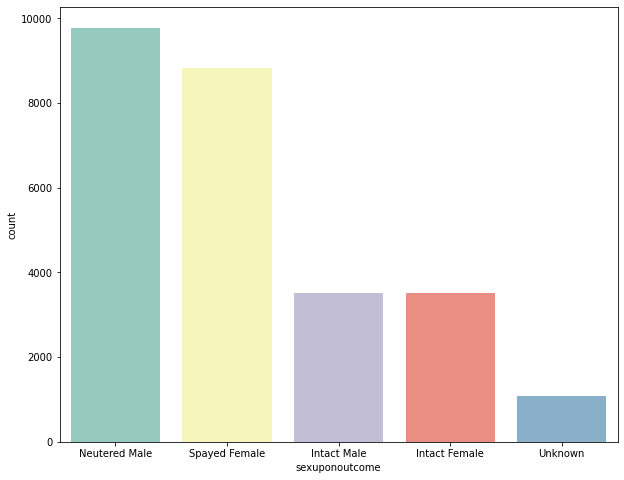

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(train.sexuponoutcome, palette='Set3')

### Is neureted?

In [ ]:
def isNeutered(dataFrame):
    dataFrame['isNeutered'] = pd.np.where(dataFrame.sexuponoutcome.str.contains("Neutered"), 1, 
                                          pd.np.where(dataFrame.sexuponoutcome.str.contains("Spayed"), 1, 0))
    return dataFrame

In [ ]:
train = isNeutered(train)
test = isNeutered(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


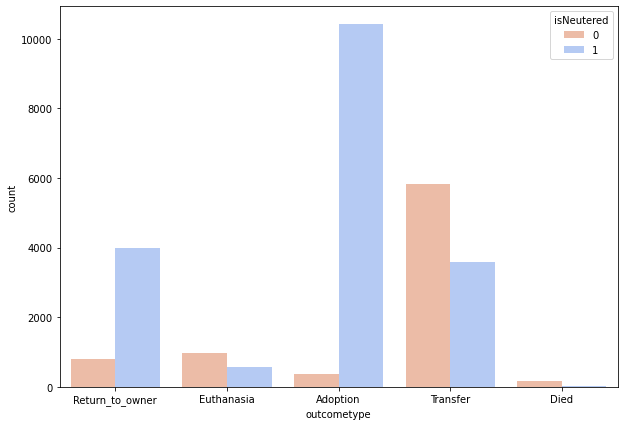

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='isNeutered', palette='coolwarm_r')

In [ ]:
def setSex(dataFrame):
    dataFrame['sex'] = pd.np.where(dataFrame.sexuponoutcome.str.contains("Female"), "Female",
                       pd.np.where(dataFrame.sexuponoutcome.str.contains("Male"), "Male", "None"))
    return dataFrame

In [ ]:
train= setSex(train)
test= setSex(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,dayOfWeek,hour,season,isNeutered,sex
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,365,0,12,1,Evening,0,2014,2,Wed,18,Winter,1,Male
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,365,0,12,1,Morning,1,2013,10,Sun,12,Autumn,1,Female
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,730,0,24,2,Morning,1,2015,1,Sat,12,Winter,1,Male
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,21,1,0,0,Evening,0,2014,7,Fri,19,Summer,0,Male
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,730,0,24,2,Morning,0,2013,11,Fri,12,Autumn,1,Male


## BREED

In [ ]:
train.breed.unique().size

1380

Mix or Pure

In [ ]:
import re
train['breedType'] = train.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')
                        
test['breedType'] = test.breed.str.extract('({})'.format('|'.join(['Mix'])), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna('pure')                        

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


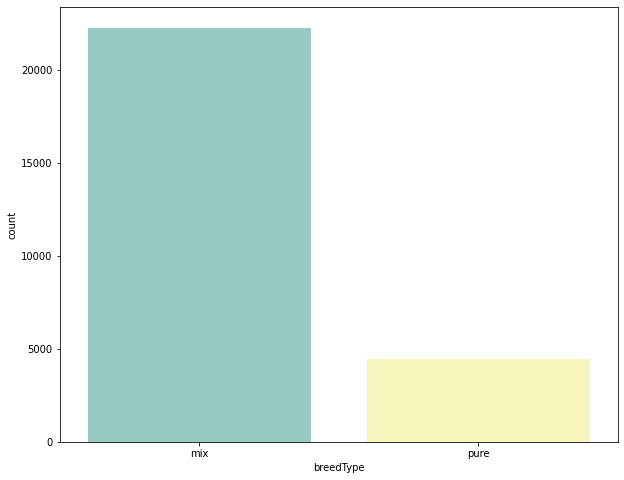

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(train.breedType, palette='Set3')

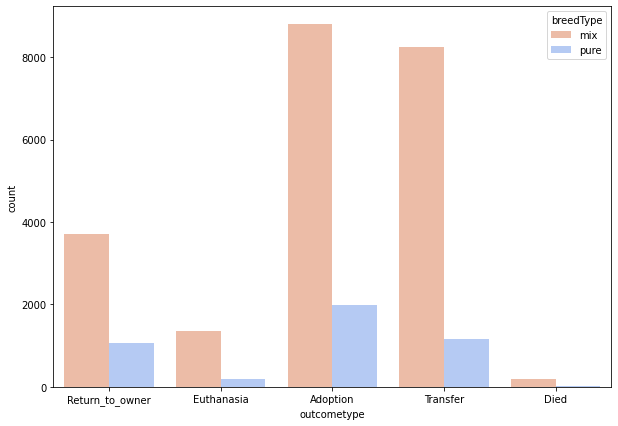

In [ ]:
f, (ax1) = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=train, x='outcometype',hue='breedType', palette='coolwarm_r')

### Top 50 Breeds

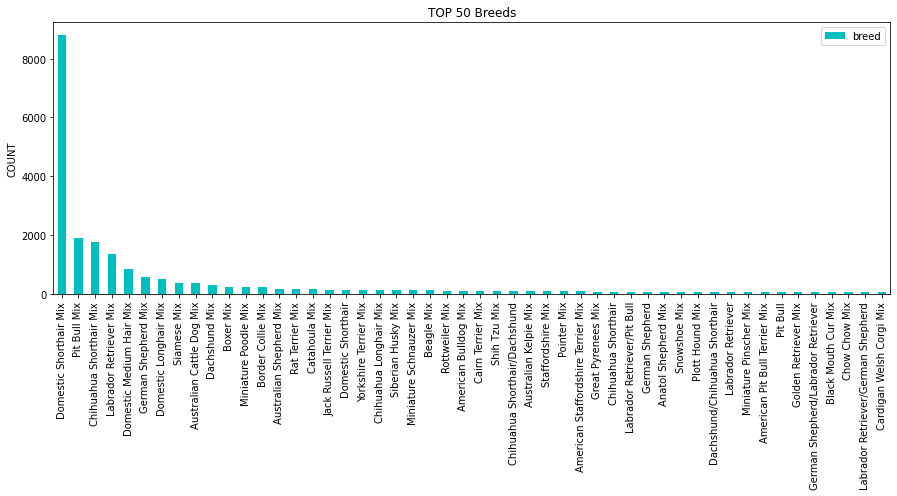

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.title('TOP 50 Breeds')
plt.ylabel('COUNT')
train['breed'].value_counts()[:50].plot(kind='bar', color='c')
plt.legend()
plt.show()

In [ ]:
n = 50
mostCommonBreeds = train['breed'].value_counts()[:n].index.tolist()
train['breedIs'] = 'other'
test['breedIs'] = 'other'
for i in mostCommonBreeds:
  train['breedIs'][train['breed'] == i] = i
  test['breedIs'][test['breed'] == i] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train.head()

,outcometype,animaltype,sexuponoutcome,breed,color,hasName,isNeutered,isSpayed,AgeInDays,isPuppy,AgeInMonths,months,years,year,month,sex,breed_type,breedIs
0,Return_to_owner,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,1,0,365,0,12,80,6,2014,2,Male,mix,other
1,Euthanasia,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,0,1,365,0,12,84,6,2013,10,Female,mix,other
2,Adoption,Dog,Neutered Male,Pit Bull Mix,Blue/White,1,1,0,730,0,24,69,5,2015,1,Male,mix,other
3,Transfer,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,0,0,0,21,1,1,75,6,2014,7,Male,mix,other
4,Transfer,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,0,1,0,730,0,24,83,6,2013,11,Male,pure,other


In [ ]:
test.breedIs.unique().size

51

In [ ]:
train.head()

,outcometype,outcomesubtype,animaltype,sexuponoutcome,color,hasName,isNeutered,AgeInDays,isPuppy,AgeInMonths,AgeInYears,partOfTheDay,weekend,year,month,season,sex,breed_type,breedIs
0,Return_to_owner,NaN,Dog,Neutered Male,Brown/White,1,1,365,0,12,1,Evening,0,2014,2,Winter,Male,mix,other
1,Euthanasia,Suffering,Cat,Spayed Female,Cream Tabby,1,1,365,0,12,1,Morning,1,2013,10,Autumn,Female,mix,Domestic Shorthair Mix
2,Adoption,Foster,Dog,Neutered Male,Blue/White,1,1,730,0,24,2,Morning,1,2015,1,Winter,Male,mix,Pit Bull Mix
3,Transfer,Partner,Cat,Intact Male,Blue Cream,0,0,21,1,1,1,Evening,0,2014,7,Summer,Male,mix,Domestic Shorthair Mix
4,Transfer,Partner,Dog,Neutered Male,Tan,0,1,730,0,24,2,Morning,0,2013,11,Autumn,Male,pure,other


## COLOR

In [ ]:
color_counts = train['color'].value_counts()
color_counts.head(20)

Black/White            2824
Black                  2288
Brown Tabby            1631
Brown Tabby/White       939
White                   930
Brown/White             884
Orange Tabby            841
Tan/White               773
Tricolor                752
Blue/White              702
Black/Tan               672
White/Black             643
Brown                   639
Tan                     628
White/Brown             569
Tortie                  529
Calico                  517
Orange Tabby/White      455
Brown Brindle/White     450
Blue                    449
Name: color, dtype: int64

In [ ]:
train['isMultiColor'] = train['color'].apply(lambda x : 1 if '/' in x else 0)
test['isMultiColor'] = test['color'].apply(lambda x : 1 if '/' in x else 0)

In [ ]:
train = train.drop(['color'], axis=1)
test = test.drop(['color'], axis=1)

## Cats and Dogs

Kediler için tüm modellerim büyük farkla daha iyi sonuç verdiği için datayı kediler ve köpekler olarak iki ayrı şekilde train edip test datasını da ikiye bölerek predict ettim. Bu yüzden aşağıdaki kod satırı ile traini ayırarak 'dogs' ve 'cats' oluşturdum.

In [ ]:
dogs = train.loc[train['animaltype'] == 'Dog']

### Is an Aggressive Dog?

In [ ]:
def isAggressive(x):
  if x in ['American Staffordshire Terrier', 'Rottweiler', 'German Shepherd', 'Alaskan Malamute', 'American Bulldog', 'Siberian Husky', 'Chow Chow', 'Dachshund','Great Dane','Dalmatian','Pit Bull']:
    return 1
  elif 'Pit Bull' in x:
    return 1
  else:
    return 0

In [ ]:
dogs['aggressive'] = dogs.breed.apply(isAggressive)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Shedding

In [ ]:
def setShed(x):
  if x in ['Labrador Retriever', 'German Shepherd', 'Golden Retriever', 'Siberian Husky', 'Akita', 'Chow Chow', 'Great Pyrenees', 'Saint Bernard','Alaskan Malamute','American Eskimo','Cardigan Welsh Corgi']:
    return 1
  else:
    return 0

In [ ]:
dogs['shed'] = dogs.breed.apply(setShed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train = train.drop(['breed'], axis=1)
cats = train.loc[train['animaltype'] == 'Cat']



# MODELS

## Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
import xgboost as xgb

All Data

In [ ]:
X = train.drop('outcometype', axis=1)
X = pd.get_dummies(X)
y = train['outcometype']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Dogs

In [ ]:
dogs = dogs.drop(['breed'], axis=1)
X_dogs = dogs.drop('outcometype', axis=1)
X_dogs = pd.get_dummies(X_dogs)
y_dogs = dogs['outcometype']
from sklearn.model_selection import train_test_split
X_train_dogs, X_test_dogs, y_train_dogs, y_test_dogs = train_test_split(X_dogs, y_dogs, test_size=0.2, random_state=1)

Cats

In [ ]:
X_cats = cats.drop('outcometype', axis=1)
X_cats = pd.get_dummies(X_cats)
y_cats = cats['outcometype']
from sklearn.model_selection import train_test_split
X_train_cats, X_test_cats, y_train_cats, y_test_cats = train_test_split(X_cats, y_cats, test_size=0.2, random_state=1)

Test datasının kedi ve köpeklere ayrılması

In [ ]:
test_dogs = test.loc[test['animaltype'] == 'Dog']
test_dogs['aggressive'] = test_dogs.breed.apply(isAggressive)
test_dogs['shed'] = test_dogs.breed.apply(setShed)
test = test.drop(['breed'], axis=1)
test_cats = test.loc[test['animaltype'] == 'Cat']

test_dogs = test_dogs.drop(['breed'], axis=1)
# test_cats = test_cats.drop(['breed'], axis=1)

dog_ids = test_dogs['id']
cat_ids = test_cats['id']

test_dogs = test_dogs.drop('id', axis = 1)
test_dogs = pd.get_dummies(test_dogs)

test_cats = test_cats.drop('id', axis = 1)
test_cats = pd.get_dummies(test_cats)

test = test.drop('id', axis = 1)
test = pd.get_dummies(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
clf.predict(test)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, clf.predict(X_test)))

[[4182    0    0    0  150]
 [  16    0    0    0   77]
 [ 219    0    0    0  384]
 [1570    0    0    0  331]
 [1406    0    0    0 2349]]
0.6112879071508798


With KFold

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

clf = DecisionTreeClassifier(max_depth=7)
for train, test in KFold(n_splits=10).split(X):
    clf.fit(X_train, y_train)
    print(accuracy_score(y_test, clf.predict(X_test)))

0.6638899288655934
0.6643579183826283
0.6644515162860352
0.6633283414451516
0.6639835267690004
0.6637027330587795
0.6643579183826283
0.6635155372519655
0.6641707225758143
0.6637027330587795


Cats

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_cats, y_train_cats)
pred = clf.predict(X_test_cats)
print(confusion_matrix(y_test_cats, pred))
print(accuracy_score(y_test_cats, clf.predict(X_test_cats)))

[[ 670    0    0    0  150]
 [   3    1    0    0   30]
 [  11    0    0    0  126]
 [  48    0    0    0   58]
 [ 110    2    0    0 1015]]
0.7580935251798561


Dogs

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_dogs, y_train_dogs)
pred = clf.predict(X_test_dogs)
print(confusion_matrix(y_test_dogs, pred))
print(accuracy_score(y_test_dogs, clf.predict(X_test_dogs)))

[[782   0   0 493   8]
 [  1   0   0   4   6]
 [ 17   0   0 110  45]
 [175   0   0 687  18]
 [213   0   0 313 247]]
0.5501763385700545


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred_winner = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


61.59

Cats

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_cats, y_train_cats)
acc_log = round(logreg.score(X_train_cats, y_train_cats) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


73.12

Dogs

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dogs, y_train_dogs)

acc_log = round(logreg.score(X_train_dogs, y_train_dogs) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


53.13

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, y_train)  

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

78.87

Cats

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_cats, y_train_cats)  
kn_cats = knn.predict(test_cats)  
acc_knn = round(knn.score(X_train_cats, y_train_cats) * 100, 2)
acc_knn

84.98

Dogs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train_dogs, y_train_dogs)  
kn_dogs = knn.predict(test_dogs)  
acc_knn = round(knn.score(X_train_dogs, y_train_dogs) * 100, 2)
acc_knn

70.75

### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# rf_pred = rf.predict_proba(test)

rf.score(X_train, y_train)
acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
acc_random_forest

99.72

In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [1000, 5000],
    'max_depth' : [6, 10, 12],
    'criterion' :['gini', 'entropy'],
    'random_state' : [0, 1]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


CV_rfc.best_params_


Best params : 'n_estimators': 1000, 'max_depth' : 10, 'criterion' : 'gini', 'random_state' : 1



In [ ]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=20,
                             min_samples_leaf=1,
                             max_depth = 10,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

rf.fit(X_train, y_train)
# rf_pred = rf.predict(test)

rf.score(X_train, y_train)


0.6880069886434543

Feature Importance

<function matplotlib.pyplot.show>

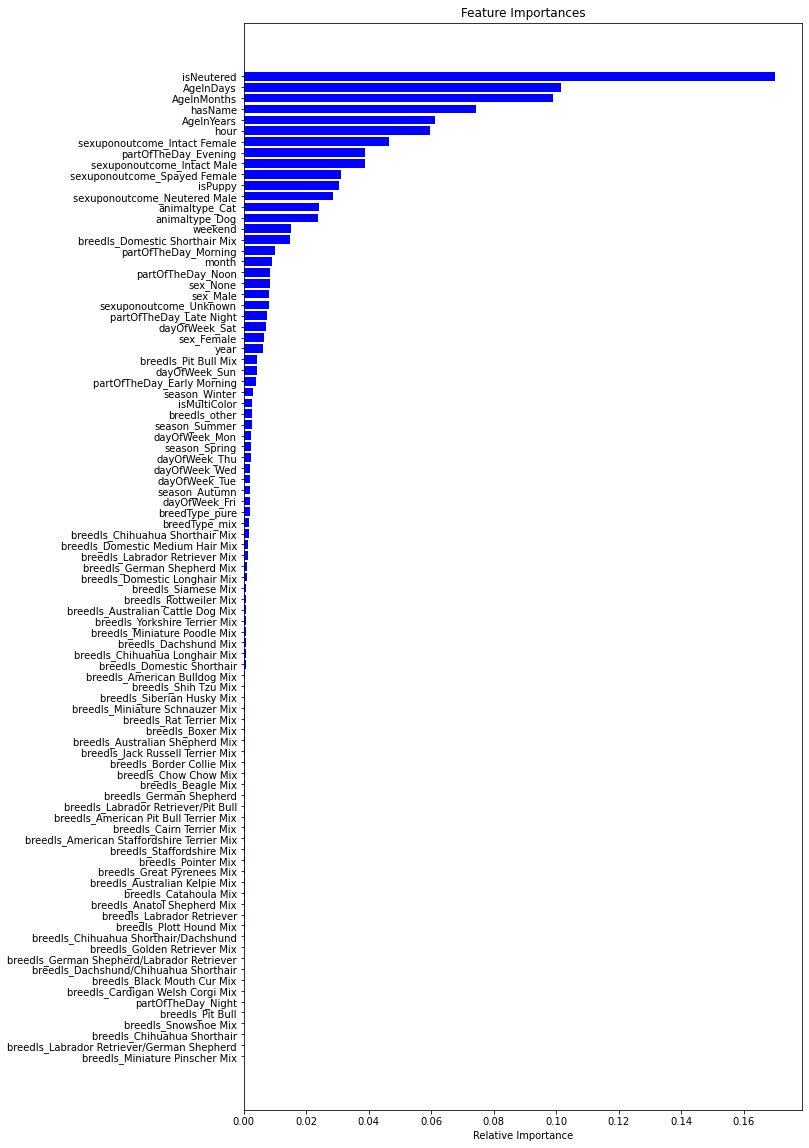

In [ ]:
features=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

Cats

In [ ]:
rf_cats = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_cats.fit(X_train_cats, y_train_cats)
rf_cat = rf_cats.predict_proba(test_cats)

rf_cats.score(X_train_cats, y_train_cats)
acc_random_forest = round(rf_cats.score(X_train_cats, y_train_cats) * 100, 2)
acc_random_forest

86.44

<function matplotlib.pyplot.show>

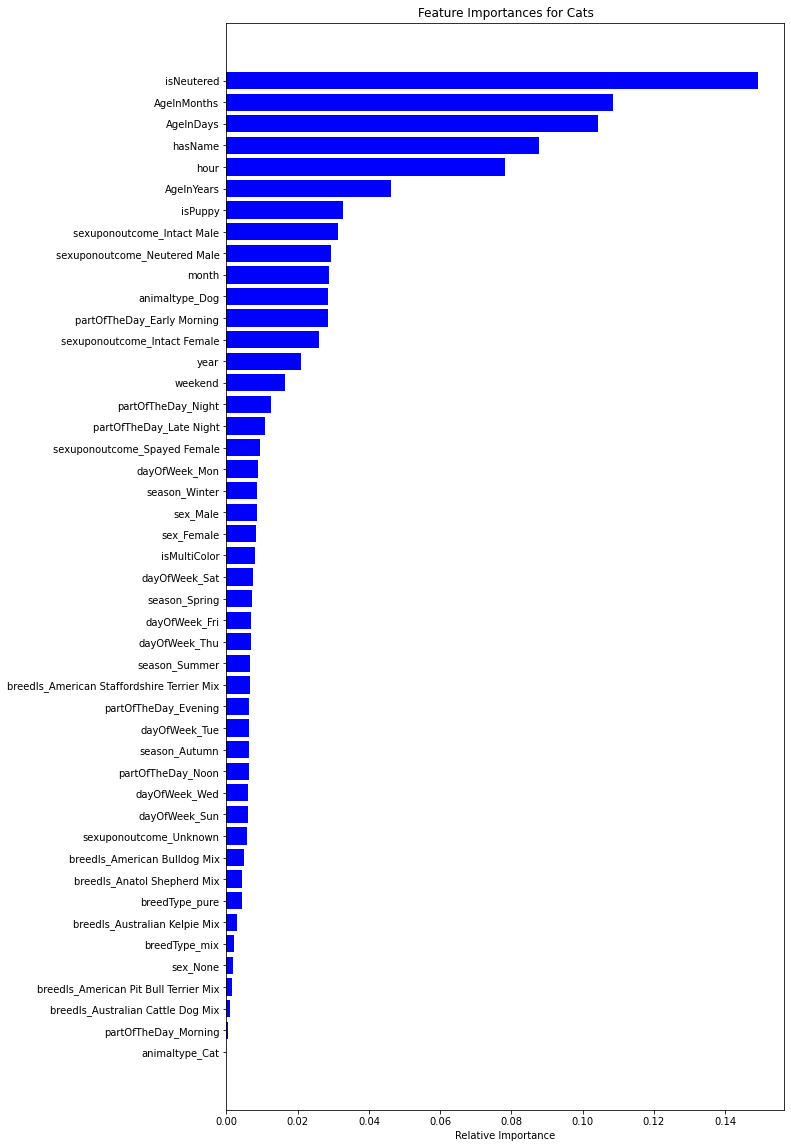

In [ ]:
features=X.columns
importances = rf_cats.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances for Cats')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

Dogs

In [ ]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf_dogs = rf.fit(X_train_dogs, y_train_dogs)
rf_dog = rf_dogs.predict_proba(test_dogs)

rf_dogs.score(X_train_dogs, y_train_dogs)
acc_random_forest = round(rf_dogs.score(X_train_dogs, y_train_dogs) * 100, 2)
acc_random_forest

<function matplotlib.pyplot.show>

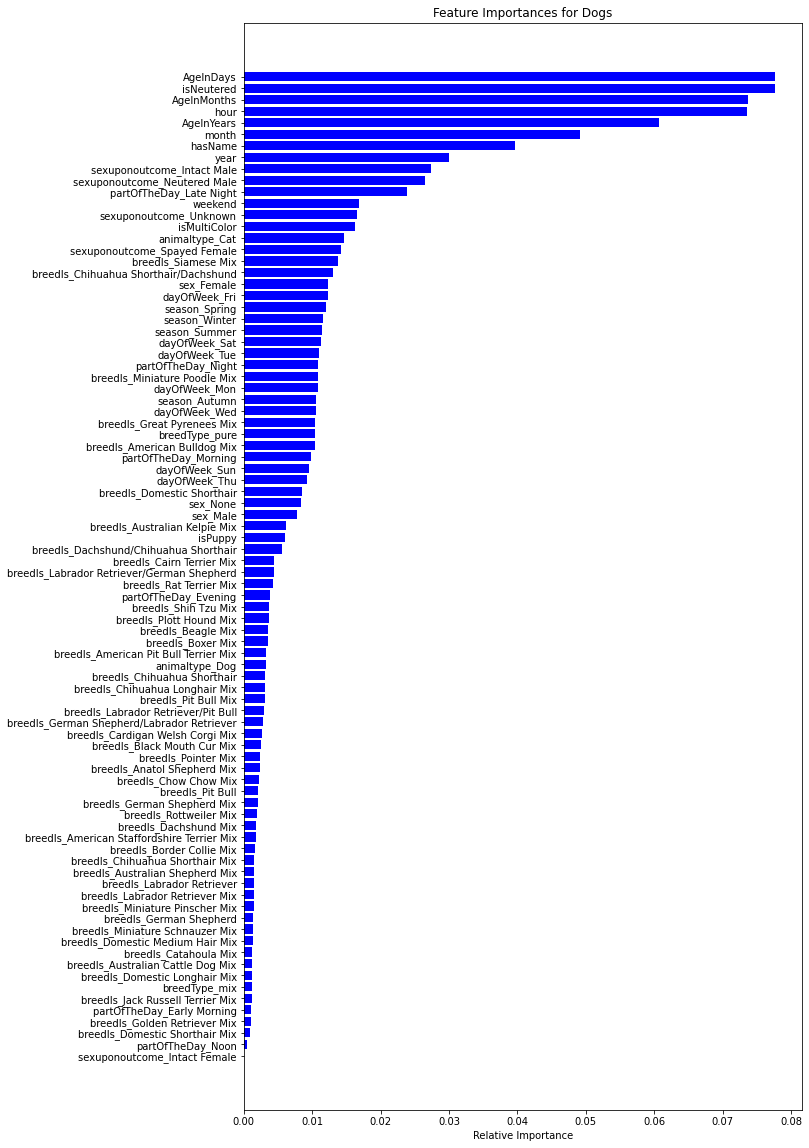

In [ ]:
features=X.columns
importances = rf_dogs.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,20))
plt.title('Feature Importances for Dogs')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show

### XGBoost

ROC Curve

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("CMRmap"))

Without Grid Search and Parameters (Base)

[0]	validation_0-mlogloss:1.51298	validation_1-mlogloss:1.51297
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.43374	validation_1-mlogloss:1.43377
[2]	validation_0-mlogloss:1.36677	validation_1-mlogloss:1.3667
[3]	validation_0-mlogloss:1.30966	validation_1-mlogloss:1.30962
[4]	validation_0-mlogloss:1.26035	validation_1-mlogloss:1.26017
[5]	validation_0-mlogloss:1.21691	validation_1-mlogloss:1.21696
[6]	validation_0-mlogloss:1.17901	validation_1-mlogloss:1.17897
[7]	validation_0-mlogloss:1.1455	validation_1-mlogloss:1.14553
[8]	validation_0-mlogloss:1.11536	validation_1-mlogloss:1.11548
[9]	validation_0-mlogloss:1.08858	validation_1-mlogloss:1.08859
[10]	validation_0-mlogloss:1.06443	validation_1-mlogloss:1.06453
[11]	validation_0-mlogloss:1.0428	validation_1-mlogloss:1.04285
[12]	validation_0-mlogloss:1.02337	validation_1-mlogloss:1.02357
[

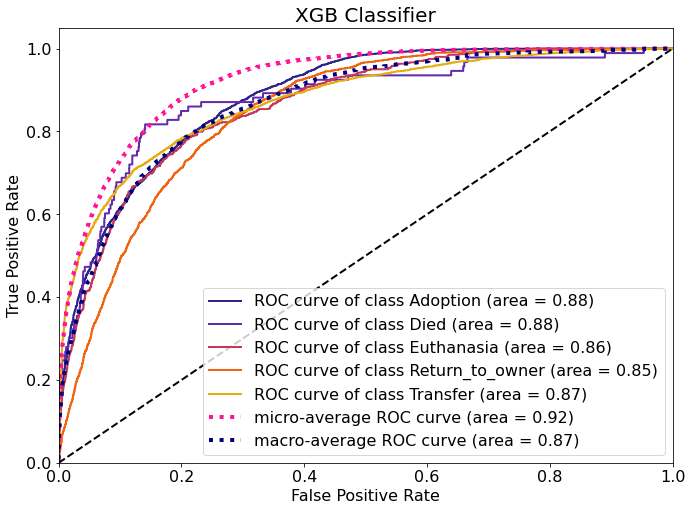

68.33


In [ ]:
model = xgb.XGBClassifier()
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test,y_test)],
    early_stopping_rounds=50
    )
xgboost_pred = model.predict_proba(test)
score = model.score(X_train, y_train)
score = round(score * 100, 2)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)

Grid Search

In [ ]:
alg = xgb.XGBClassifier(objective='multi:softprob')
params = param_grid = {
    'n_estimators': [500, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [5,10,15],
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.02]
}
clf = GridSearchCV(alg, params, 
                        verbose=1, 
                        error_score='log_loss')

clf.fit(X_train,y_train)
pred = clf.predict_proba(test)
print(clf.best_score_)
print(clf.best_params_)


Best params : max_depth=5, n_estimators=1000, learning_rate=0.01,subsample=0.8, colsample_bytree=0.7

In [ ]:
test

array([24039, 24040, 24041, ..., 26707, 26708, 26709])

[0]	validation_0-mlogloss:1.59937	validation_1-mlogloss:1.5994
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.58892	validation_1-mlogloss:1.58893
[2]	validation_0-mlogloss:1.5788	validation_1-mlogloss:1.57888
[3]	validation_0-mlogloss:1.56962	validation_1-mlogloss:1.56969
[4]	validation_0-mlogloss:1.55987	validation_1-mlogloss:1.56003
[5]	validation_0-mlogloss:1.55082	validation_1-mlogloss:1.55101
[6]	validation_0-mlogloss:1.54173	validation_1-mlogloss:1.542
[7]	validation_0-mlogloss:1.53325	validation_1-mlogloss:1.53353
[8]	validation_0-mlogloss:1.52415	validation_1-mlogloss:1.5245
[9]	validation_0-mlogloss:1.5152	validation_1-mlogloss:1.5156
[10]	validation_0-mlogloss:1.5063	validation_1-mlogloss:1.50673
[11]	validation_0-mlogloss:1.49776	validation_1-mlogloss:1.49821
[12]	validation_0-mlogloss:1.48973	validation_1-mlogloss:1.49022
[13]	v

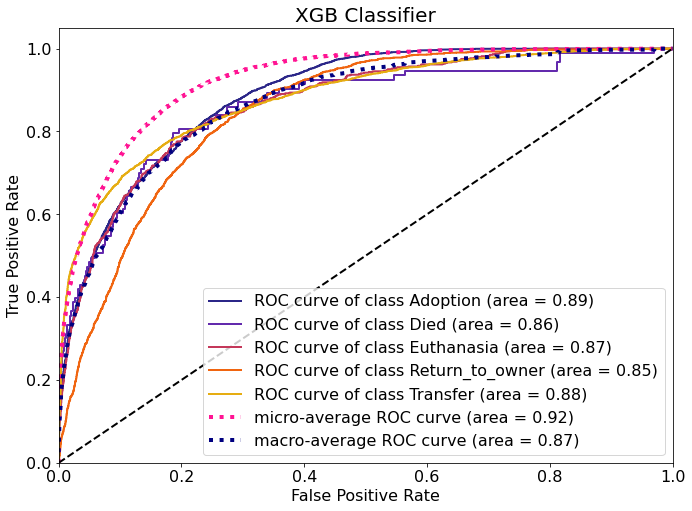

0.6953076251091975


In [ ]:
model = xgb.XGBClassifier(max_depth=5, missing=np.nan, n_estimators=500, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
        
model.fit(
    X_train,
    y_train,
    eval_metric='mlogloss',
    eval_set=[(X_train,y_train),(X_test, y_test)],
    early_stopping_rounds=50
    )

score = model.score(X_train, y_train)
xgb_pred_with_grid = model.predict_proba(test)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='XGB Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)

Cats

[0]	validation_0-mlogloss:1.5949	validation_1-mlogloss:1.59509
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.58051	validation_1-mlogloss:1.58087
[2]	validation_0-mlogloss:1.56638	validation_1-mlogloss:1.56695
[3]	validation_0-mlogloss:1.55303	validation_1-mlogloss:1.5538
[4]	validation_0-mlogloss:1.53949	validation_1-mlogloss:1.54037
[5]	validation_0-mlogloss:1.52616	validation_1-mlogloss:1.52716
[6]	validation_0-mlogloss:1.51281	validation_1-mlogloss:1.51392
[7]	validation_0-mlogloss:1.49994	validation_1-mlogloss:1.50118
[8]	validation_0-mlogloss:1.48726	validation_1-mlogloss:1.48871
[9]	validation_0-mlogloss:1.47486	validation_1-mlogloss:1.47646
[10]	validation_0-mlogloss:1.46247	validation_1-mlogloss:1.46413
[11]	validation_0-mlogloss:1.45054	validation_1-mlogloss:1.45231
[12]	validation_0-mlogloss:1.43902	validation_1-mlogloss:1.44096


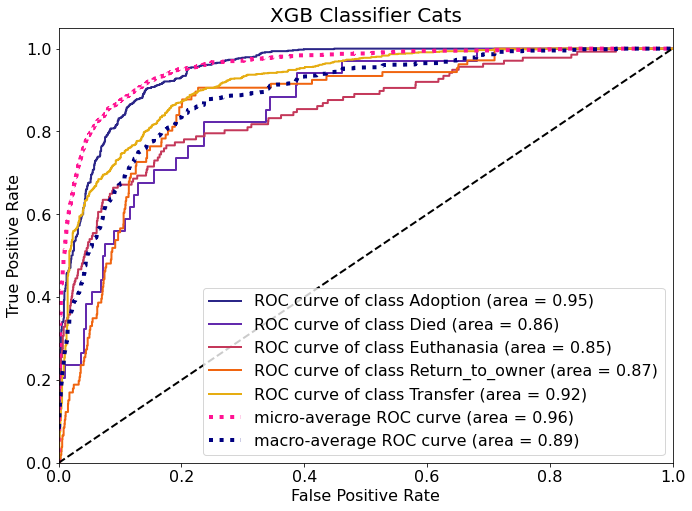

0.7984931968964354


In [ ]:
model = xgb.XGBClassifier(max_depth=5, missing=np.nan, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
        
model.fit(
    X_train_cats,
    y_train_cats,
    eval_metric='mlogloss',
    eval_set=[(X_train_cats,y_train_cats),(X_test_cats, y_test_cats)],
    early_stopping_rounds=50
    )
xgb_cat = model.predict_proba(test_cats)
score = model.score(X_train_cats, y_train_cats)
skplt.metrics.plot_roc(y_test_cats, model.predict_proba(X_test_cats), title='XGB Classifier Cats', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

print(score)


Dogs

[0]	validation_0-mlogloss:1.60121	validation_1-mlogloss:1.60129
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.59401	validation_1-mlogloss:1.59411
[2]	validation_0-mlogloss:1.58618	validation_1-mlogloss:1.58636
[3]	validation_0-mlogloss:1.5783	validation_1-mlogloss:1.57856
[4]	validation_0-mlogloss:1.57062	validation_1-mlogloss:1.57096
[5]	validation_0-mlogloss:1.5635	validation_1-mlogloss:1.56394
[6]	validation_0-mlogloss:1.55598	validation_1-mlogloss:1.55652
[7]	validation_0-mlogloss:1.54896	validation_1-mlogloss:1.54954
[8]	validation_0-mlogloss:1.54196	validation_1-mlogloss:1.54262
[9]	validation_0-mlogloss:1.53479	validation_1-mlogloss:1.53556
[10]	validation_0-mlogloss:1.52786	validation_1-mlogloss:1.52868
[11]	validation_0-mlogloss:1.52126	validation_1-mlogloss:1.52219
[12]	validation_0-mlogloss:1.51428	validation_1-mlogloss:1.51529


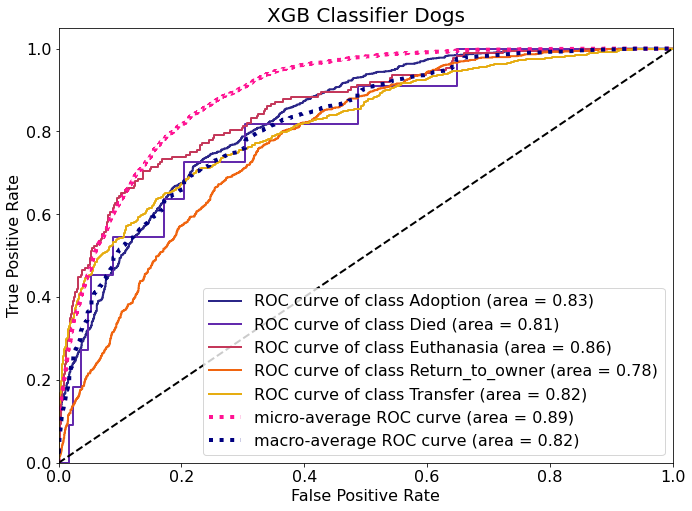

62.91


In [ ]:
model = xgb.XGBClassifier(max_depth=5, missing=np.nan, n_estimators=500, learning_rate=0.01,  subsample=0.8, colsample_bytree=0.7, seed=1024,objective= 'multi:softprob')
        

model.fit(
    X_train_dogs,
    y_train_dogs,
    eval_metric='mlogloss',
    eval_set=[(X_train_dogs,y_train_dogs),(X_test_dogs,y_test_dogs)],
    early_stopping_rounds=50
    )
score = model.score(X_train_dogs, y_train_dogs)
score = round(score * 100, 2)
xgb_dog = model.predict_proba(test_dogs)
skplt.metrics.plot_roc(y_test_dogs, model.predict_proba(X_test_dogs), title='XGB Classifier Dogs', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print(score)


### Gradient Boosting Classifier

In [ ]:
import pandas as pd, sys, time
def gridsearch_gbm(params_grid, X_train, y_train):
    model_start = time.time()  
    gbc = GradientBoostingClassifier()
    best_model = GridSearchCV(gbc, param_grid=params_grid, n_jobs=-1)
    model_end = time.time()

    
    fit_start = time.time()
    best_model.fit(X_train, y_train)
    fit_end = time.time()
  
    
    return best_model

def gridsearch_stats(model, X_test, y_test):
    print(model.best_params_)
    
    probas = model.predict_proba(X_test)
    print(log_loss(y_test, probas))
    
    return probas

In [ ]:
params = {
            'max_depth': [10,15,20,25],
            'min_samples_leaf': [100,500,1000], 
            "learning_rate": [0.03, 0.05], 
            "max_features": [10,15,20]
            }

gbm_gc = gridsearch_gbm(params, X_train, y_train)

In [ ]:
gbm_gc.best_params_

{'learning_rate': 0.05,
 'max_depth': 25,
 'max_features': 13,
 'min_samples_leaf': 500}

In [ ]:
gridsearch_stats(gbm_gc, X_test, y_test)

{'learning_rate': 0.05, 'max_depth': 25, 'max_features': 13, 'min_samples_leaf': 500}
0.8465152338498027


array([[1.35735583e-01, 3.75008282e-02, 4.00497633e-02, 6.19362737e-02,
        7.24777552e-01],
       [6.37770266e-01, 2.30614346e-03, 1.14231023e-02, 2.74637335e-01,
        7.38631536e-02],
       [9.61247242e-01, 3.36780860e-04, 2.91139467e-03, 8.98684293e-03,
        2.65177392e-02],
       ...,
       [5.73236970e-02, 9.70245245e-03, 1.21537436e-01, 2.56616144e-01,
        5.54820271e-01],
       [1.82092247e-01, 1.24525958e-03, 6.56174337e-02, 5.45129370e-01,
        2.05915690e-01],
       [4.79980743e-01, 7.25501036e-03, 7.47350465e-02, 1.99121504e-01,
        2.38907696e-01]])

In [ ]:
probas = gbm_gc.predict_proba(test)

RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=0, max_features= 15, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=1000, 
                                 n_jobs=-1, random_state=1, max_features=60, 
                            max_depth= 5), 
                              X_train, y_train, cv=5)),4)))

[0.63724267 0.64024961 0.62839314 0.63338534 0.61716069]

mean of cv-scores: 0.6574


Cats

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=0, max_features= 15, 
                            max_depth= 5), 
                              X_train_cats, y_train_cats, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=500, 
                                 n_jobs=-1, random_state=42, max_features= 10, 
                            max_depth= 5), 
                              X_train_cats, y_train_cats, cv=5)),4)))

[0.77303371 0.76629213 0.7752809  0.79054054 0.79054054]

mean of cv-scores: 0.7751


### GaussianNB

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train,y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

23.01

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train_cats,y_train_cats)  
Y_pred = gaussian.predict(X_test_cats)  
acc_gaussian = round(gaussian.score(X_train_cats, y_train_cats) * 100, 2)
acc_gaussian

68.88

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train_dogs,y_train_dogs)  
Y_pred = gaussian.predict(X_test_dogs)  
acc_gaussian = round(gaussian.score(X_train_dogs, y_train_dogs) * 100, 2)
acc_gaussian

15.73

### LightGBM

In [ ]:
param = [{'n_estimators': [100, 500, 1000],
         'learning_rate': [0.1, 0.05, 0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train, y_train)
print(name,': ',model.best_params_)
pred_y_cats = model.predict_proba(test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Best params : {'n_estimators': 1000,
               'learning_rate': 0.01}

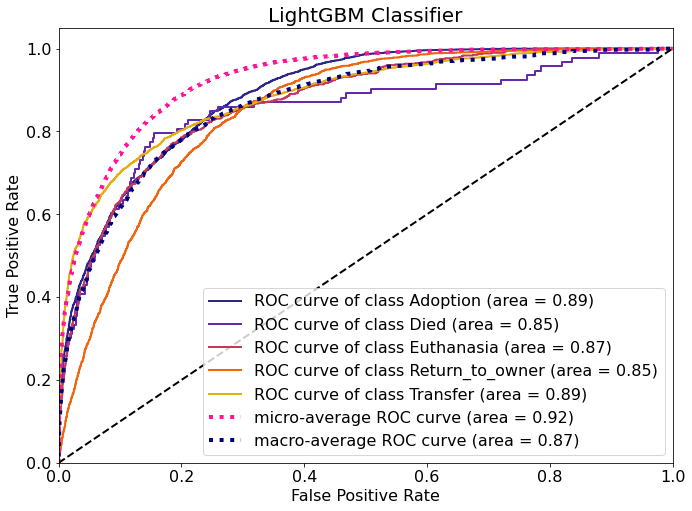

train score: 0.7377386746536878
test score: 0.6840134780980907


In [ ]:
param = [{'n_estimators': [1000],
         'learning_rate': [0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train, y_train)
lightgbm_pred = model.predict_proba(test)
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), title='LightGBM Classifier', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()
print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))

Cats

LightGBM :  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
train score: 0.8294163949173508
test score: 0.8039568345323741


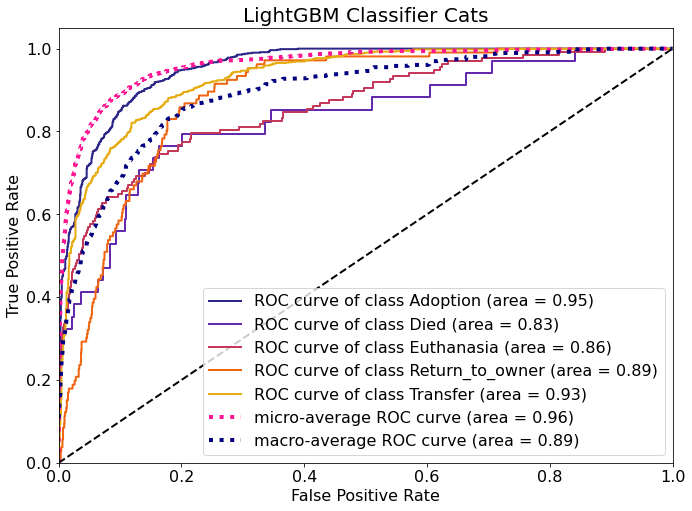

In [ ]:
param = [{'n_estimators': [500],
         'learning_rate': [0.01],
          'max_depth' : [6]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train_cats, y_train_cats)
print(name,': ',model.best_params_)
lightgbm_pred_cats = model.predict_proba(test_cats)
print('train score: {}'.format(model.score(X_train_cats, y_train_cats)))
print('test score: {}'.format(model.score(X_test_cats, y_test_cats)))
skplt.metrics.plot_roc(y_test_cats, model.predict_proba(X_test_cats), title='LightGBM Classifier Cats', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

Dogs

LightGBM :  {'learning_rate': 0.01, 'n_estimators': 500}
train score: 0.6539201539201539
test score: 0.616864379608849


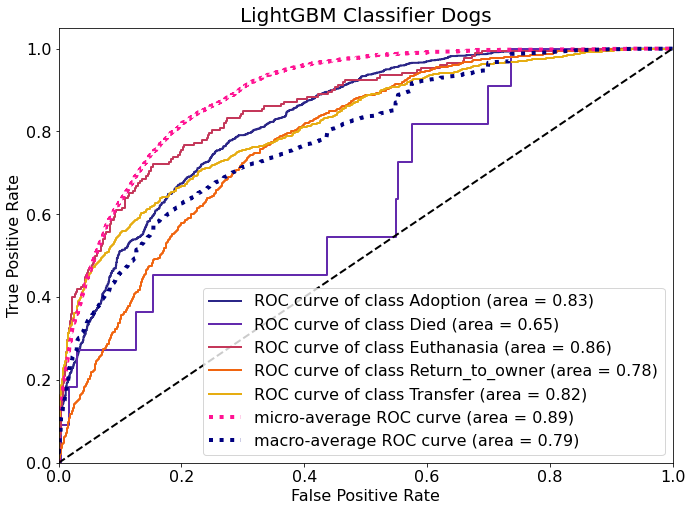

In [ ]:
param = [{'n_estimators': [500],
         'learning_rate': [0.01]}]
model = GridSearchCV(LGBMClassifier(), param, cv=5)
name = 'LightGBM'
model.fit(X_train_dogs, y_train_dogs)
print(name,': ',model.best_params_)
lightgbm_pred_dogs = model.predict_proba(test_dogs)
print('train score: {}'.format(model.score(X_train_dogs, y_train_dogs)))
print('test score: {}'.format(model.score(X_test_dogs, y_test_dogs)))
skplt.metrics.plot_roc(y_test_dogs, model.predict_proba(X_test_dogs), title='LightGBM Classifier Dogs', plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(11,8), cmap=cmap)
plt.show()

# Submission

Cats and Dogs submission

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv.gz')

dog = submission[submission.ID.isin(dog_ids)]
cat = submission[submission.ID.isin(cat_ids)]

dog["ID"] = dog_ids
dog["Adoption"]= lightgbm_pred_dogs[:,0]
dog["Died"]= lightgbm_pred_dogs[:,1]
dog["Euthanasia"]= lightgbm_pred_dogs[:,2]
dog["Return_to_owner"]= lightgbm_pred_dogs[:,3]
dog["Transfer"]= lightgbm_pred_dogs[:,4]

cat["ID"] = cat_ids
cat["Adoption"]= lightgbm_pred_cats[:,0]
cat["Died"]= lightgbm_pred_cats[:,1]
cat["Euthanasia"]= lightgbm_pred_cats[:,2]
cat["Return_to_owner"]= lightgbm_pred_cats[:,3]
cat["Transfer"]= lightgbm_pred_cats[:,4]

frames = [dog, cat]
result = pd.concat(frames)
result = result.sort_values('ID')
result.to_csv("last_submission.csv",index=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
submission = pd.read_csv('/content/drive/My Drive/sample_submission.csv.gz')
submission["ID"] = np.arange(lightgbm_pred.shape[0])+1
submission["Adoption"]= lightgbm_pred[:,0]
submission["Died"]= lightgbm_pred[:,1]
submission["Euthanasia"]= lightgbm_pred[:,2]
submission["Return_to_owner"]= lightgbm_pred[:,3]
submission["Transfer"]= lightgbm_pred[:,4]
submission.to_csv("lightgbm_pred.csv",index=False)